Load in the data “Cat_Hwt.csv” from the dataset available in moodle. Data was collected on male and female adult cats used for experiments:

Question 1: Exploration [45 marks]

Describe the dataset
State the number of rows and columns.
Identify the types of variables (categorical, numerical).


In [5]:
import pandas as pd

# Load the data
cat_data = pd.read_csv('Cat_Hwt.csv')

# Basic info about the dataset
print("Dataset shape:", cat_data.shape)

# What type of collum are in this dataset
print("\nColumn types:")
print(cat_data.dtypes)

# Show the first 5 rows of the dataset
print("\nFirst few rows:")
print(cat_data.head())

# Dataset basic info
print("\n Baisc info about the dataset:")
print(cat_data.info())


Dataset shape: (144, 5)

Column types:
Sex        object
Bwt       float64
Hwt       float64
Height    float64
Age       float64
dtype: object

First few rows:
  Sex  Bwt  Hwt  Height   Age
0   F  2.0  7.0    20.7  11.5
1   F  2.0  7.4    24.0   5.9
2   F  2.0  9.5    24.4  19.1
3   F  2.1  7.2    14.8  10.6
4   F  2.1  7.3    25.9   9.5

 Baisc info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
 3   Height  144 non-null    float64
 4   Age     144 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.8+ KB
None


### The code above tells us:

- There is 144 rows and 5.
- All of the types of variables are numerical but the Sex which is categorical.

### Q1B) Data quality
- Check for missing values and outliers. 
- Suggest how to handle them.


In [6]:
# Check for missing values
print("Missing values:")
print(cat_data.isnull().sum())

Missing values:
Sex       0
Bwt       0
Hwt       0
Height    0
Age       0
dtype: int64


There is currently no missing values in the dataset

In [7]:
# Outlier detection without loops
Q1 = cat_data[['Bwt', 'Hwt', 'Height', 'Age']].quantile(0.25)
Q3 = cat_data[['Bwt', 'Hwt', 'Height', 'Age']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers without loop
outliers = ((cat_data[['Bwt', 'Hwt', 'Height', 'Age']] < lower_bound) | 
            (cat_data[['Bwt', 'Hwt', 'Height', 'Age']] > upper_bound))

print("\nOUTLIERS DETECTED:")
print(outliers.sum())


OUTLIERS DETECTED:
Bwt       0
Hwt       2
Height    0
Age       0
dtype: int64


### What was found:
- The dataset has all data intact there is no missing data. 

- There is 2 cats that are outliers both has larger then normal heart weight (Hwt)

- I don't remove these 2 outliers because it isn't an error with the data, those cats are just abnormal.

### Q1. C) Univariate analysis
- Create and interpret plots for each variable (histograms, boxplots, bar charts).
- Summarize key statistics for numerical variables.


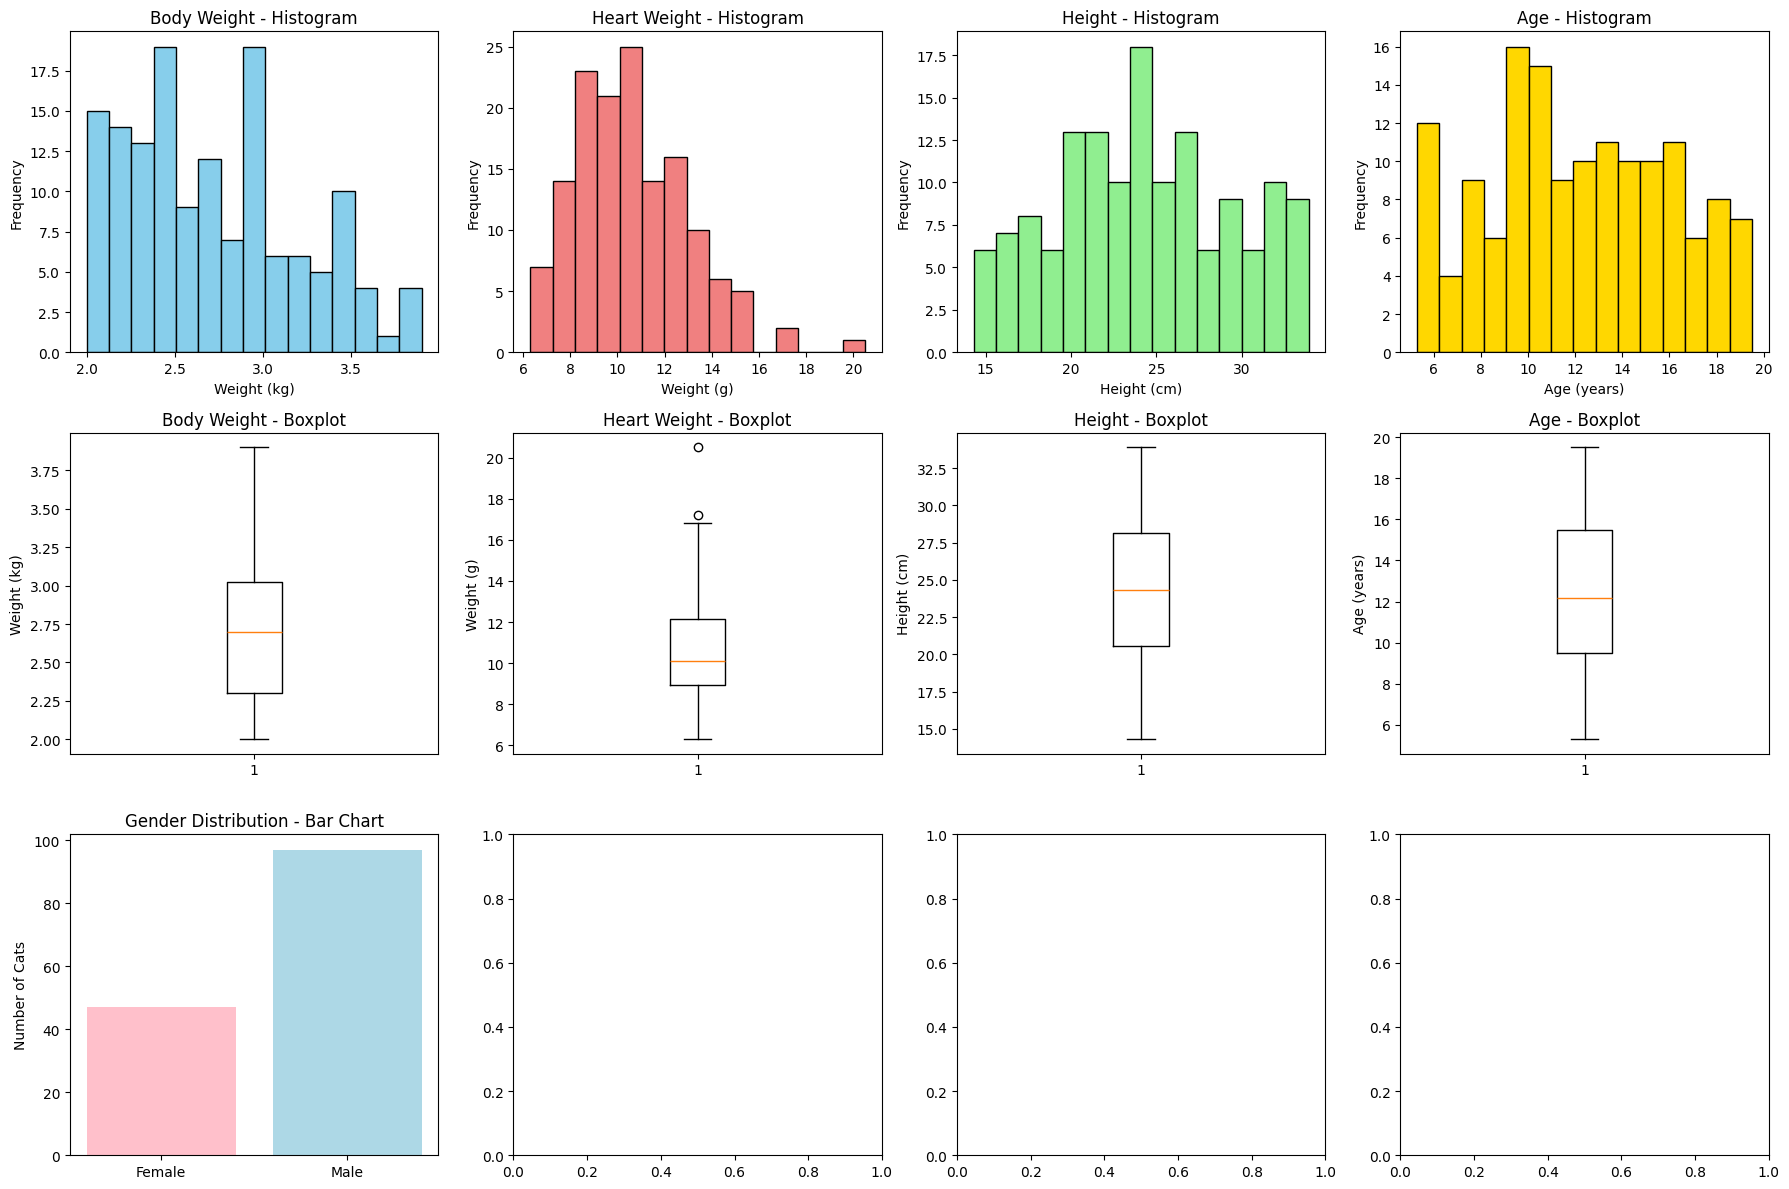

In [ ]:
import matplotlib.pyplot as plt

# 3. Create ALL plots in one organized figure
fig, axes = plt.subplots(3, 4, figsize=(18, 12))

# Body Weight (Bwt)
axes[0,0].hist(cat_data['Bwt'], bins=15, color='skyblue', edgecolor='black')
axes[0,0].set_title('Body Weight - Histogram')
axes[0,0].set_xlabel('Weight (kg)')
axes[0,0].set_ylabel('Frequency')

axes[1,0].boxplot(cat_data['Bwt'])
axes[1,0].set_title('Body Weight - Boxplot')
axes[1,0].set_ylabel('Weight (kg)')

# Heart Weight (Hwt)
axes[0,1].hist(cat_data['Hwt'], bins=15, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Heart Weight - Histogram')
axes[0,1].set_xlabel('Weight (g)')
axes[0,1].set_ylabel('Frequency')

axes[1,1].boxplot(cat_data['Hwt'])
axes[1,1].set_title('Heart Weight - Boxplot')
axes[1,1].set_ylabel('Weight (g)')

# Height
axes[0,2].hist(cat_data['Height'], bins=15, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Height - Histogram')
axes[0,2].set_xlabel('Height (cm)')
axes[0,2].set_ylabel('Frequency')

axes[1,2].boxplot(cat_data['Height'])
axes[1,2].set_title('Height - Boxplot')
axes[1,2].set_ylabel('Height (cm)')

# Age
axes[0,3].hist(cat_data['Age'], bins=15, color='gold', edgecolor='black')
axes[0,3].set_title('Age - Histogram')
axes[0,3].set_xlabel('Age (years)')
axes[0,3].set_ylabel('Frequency')

axes[1,3].boxplot(cat_data['Age'])
axes[1,3].set_title('Age - Boxplot')
axes[1,3].set_ylabel('Age (years)')

# Sex - Bar chart (span two rows)
axes[2,0].bar(['Female', 'Male'], cat_data['Sex'].value_counts().sort_index(), color=['pink', 'lightblue'])
axes[2,0].set_title('Gender Distribution - Bar Chart')
axes[2,0].set_ylabel('Number of Cats')

# Hide empty subplots
axes[2,1].set_visible(True)
axes[2,2].set_visible(False)
axes[2,3].set_visible(False)

plt.tight_layout()
plt.show()